In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

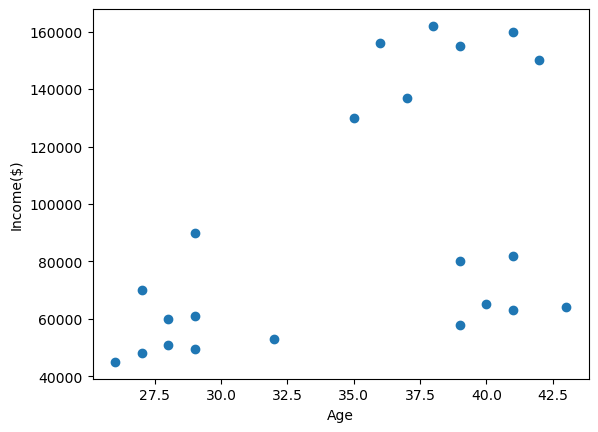

In [11]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

## Preprocessing using min max scaler

In [16]:
scaler = MinMaxScaler()

df['Income($)'] = scaler.fit_transform(df[['Income($)']])


df['Age'] = scaler.fit_transform(df[['Age']])

In [18]:
df.head(5)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


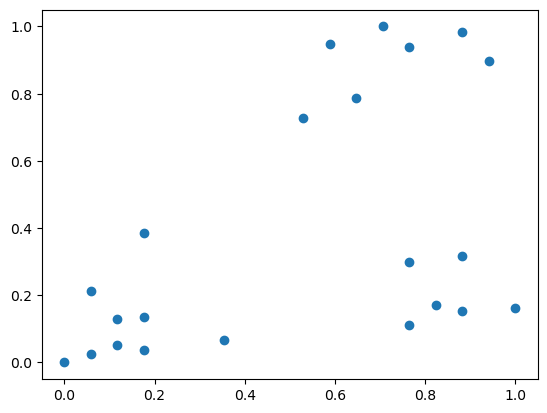

In [19]:
plt.scatter(df.Age,df['Income($)'])

In [32]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [21]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


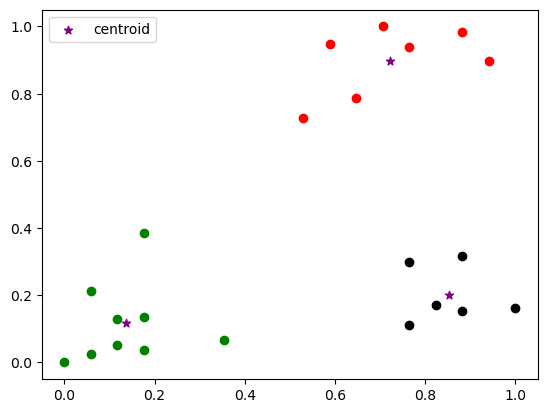

In [38]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
11,Tom,0.000000,0.000000,0
12,Arnold,0.058824,0.025641,0
13,Jared,0.117647,0.051282,0
14,Stark,0.176471,0.038462,0
15,Ranbir,0.352941,0.068376,0


Elbow Plot

In [40]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k , random_state=0, n_init="auto")
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

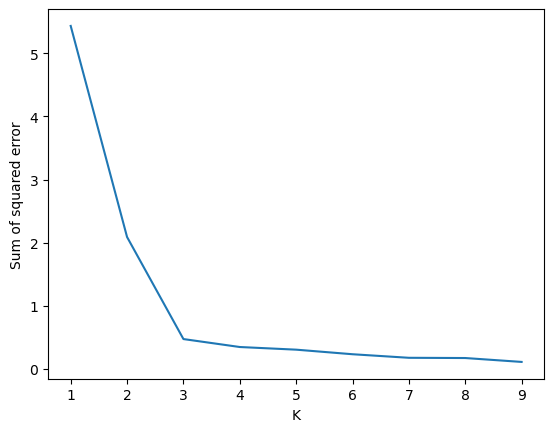

In [41]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)